# Part II - Creating Typical years for Building Simulations

**Release history**

v0 : 2020-09-15

v1 : 2021-04-27

v2 : 2022-11-05

**License**

Licensed by La Rochelle University/LaSIE & CSTB under a BSD 3 license (https://opensource.org/licenses/BSD-3-Clause).

**To use this code please cite the following publication:**

*Machard, A. , Inard, C., Alessandrini, J.M., Pelé, C., Ribéron, J.
A Methodology for Assembling Future Weather Files Including Heatwaves for Building Thermal Simulations from the European Coordinated Regional Downscaling Experiment (EURO-CORDEX) Climate Data*
https://doi.org/10.3390/en13133424

**Description**

This code creates a typical year from 30-year climate data following the norm EN 15251-4

**Data**

Data for this workshop were downloaded from the CORDEX Platform https://cordex.org/ & then bias-adjusted using observations

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Better to use bias-adjusted data
path = r"C:\Users\MACHARD\Downloads\ARTICLES\Weather_Data_Code\Part-II-and-Part-III_ExampleFiles\Multiyears-BC_Roissy_MPI-RCA4_2050s.csv"
# Path where to export the data as csv
path_out = r'C:\Users\MACHARD\Downloads\ARTICLES\Weather_Data_Code'
df = pd.read_csv(path, index_col='time_lst') ## pd.read_csv(path, index_col=0) depending on the column
df.index = pd.to_datetime(df.index)
#  !!!! Modify here according to years !!!!
list_of_years = list(range(2041, 2071))
# list_of_years = list(range(2001, 2021))

In [4]:
list_of_years

[2041,
 2042,
 2043,
 2044,
 2045,
 2046,
 2047,
 2048,
 2049,
 2050,
 2051,
 2052,
 2053,
 2054,
 2055,
 2056,
 2057,
 2058,
 2059,
 2060,
 2061,
 2062,
 2063,
 2064,
 2065,
 2066,
 2067,
 2068,
 2069,
 2070]

In [5]:
df

,tas [C],hurs [%],ps [Pa],sfcWind [m/s],rsds [kwh],clt [tenths],rsds [kwh].1,DNR[kwh],DHR[kwh],huss [kg/kg],W
time_lst,,,,,,,,,,,
2040-01-01 00:00:00,13.920689,72.160123,101468.657077,6.095967,0.026551,8.720436,0.0,0.0,0.0,8.657739,7.926941
2040-01-01 01:00:00,13.921024,72.161672,101468.698008,6.095976,0.037212,8.720436,0.0,0.0,0.0,8.658103,7.927323
2040-01-01 02:00:00,13.636547,71.875896,101367.983012,6.084079,0.057285,8.708115,0.0,0.0,0.0,8.474203,7.738013
2040-01-01 03:00:00,11.418066,78.816822,101549.384627,6.130903,0.090821,8.726310,0.0,0.0,0.0,8.095552,7.273318
2040-01-01 04:00:00,10.659458,87.594803,101458.921647,5.289859,0.020168,8.722471,0.0,0.0,0.0,8.577753,7.745094
...,...,...,...,...,...,...,...,...,...,...,...
2069-12-31 19:00:00,11.247927,79.001792,101842.673154,6.281312,3567.594745,10.000000,0.0,0.0,0.0,8.028345,7.178004
2069-12-31 20:00:00,11.251024,78.999179,101783.057443,6.285772,3572.588132,10.000000,0.0,0.0,0.0,8.029642,7.184075
2069-12-31 21:00:00,11.147802,79.004985,101782.452004,6.278936,3578.306660,10.000000,0.0,0.0,0.0,7.978309,7.130042


In [13]:
df2 = pd.DataFrame({'tas':df['tas [C]'].to_list(), 'hurs':df['hurs [%]'].to_list(), 'rsds':df['rsds [kwh]'].to_list(), 'wind':df['sfcWind [m/s]'].to_list()})
#idx = pd.date_range(start='2001-01-01 00:00',end='2020-12-31 23:00', freq='1H')
idx = pd.date_range(start='2040-01-01 00:00',end='2069-12-31 23:00', freq='1H')
dates = idx[(idx.day != 29) | (idx.month != 2)] # Remove 29th of February
df2.index = pd.to_datetime(dates)

In [14]:
# Saturated vapor pressure PWS is in hPa
df2.loc[df2.tas < 0, 'PWS'] = 6.105 * np.exp((21.875*df2.tas)/(265.5+df2.tas))
df2.loc[df2.tas > 0, 'PWS'] = 6.105 * np.exp((17.269*df2.tas)/(237.3+df2.tas))

# Vapor pressure PW is in hPa
df2['PW'] = df2['hurs']*df2['PWS']/100 # PV is in hPa

# Water content in kg/kg
df2['W'] = ((df2['PW']*100)/((df2['tas']+273.15)*461.5))*1000

## **Defining functions to calculate the FS statistic (for each variable and month), and the sum of the ranks**

In [19]:
# We calculate the FS for each variable var (tas, hurs, rsds), for each month m 
# nb is the number of days in the month

def get_FS(var, m, nb):
    
    var_df = pd.DataFrame({'Var':var})
    # Calculating daily averages
    var_df = var_df.resample('24H').mean()
    var_df['month'] = var_df.index.month
    var_df['day'] = var_df.index.day
    var_df['year'] = var_df.index.year
    #print('this is m',m)
    
    var_df = var_df[~((var_df['month'] == 2) & (var_df['day'] == 29) & (var_df['year'] == 2040))]
    var_df = var_df[~((var_df['month'] == 2) & (var_df['day'] == 29) & (var_df['year'] == 2044))]
    var_df = var_df[~((var_df['month'] == 2) & (var_df['day'] == 29) & (var_df['year'] == 2048))]
    var_df = var_df[~((var_df['month'] == 2) & (var_df['day'] == 29) & (var_df['year'] == 2052))]
    var_df = var_df[~((var_df['month'] == 2) & (var_df['day'] == 29) & (var_df['year'] == 2056))]
    var_df = var_df[~((var_df['month'] == 2) & (var_df['day'] == 29) & (var_df['year'] == 2060))]
    var_df = var_df[~((var_df['month'] == 2) & (var_df['day'] == 29) & (var_df['year'] == 2064))]
    var_df = var_df[~((var_df['month'] == 2) & (var_df['day'] == 29) & (var_df['year'] == 2068))]
        
#    var_df = var_df[~((var_df['month'] == 2) & (var_df['day'] == 29) & (var_df['year'] == 2004))]
#    var_df = var_df[~((var_df['month'] == 2) & (var_df['day'] == 29) & (var_df['year'] == 2008))]
#    var_df = var_df[~((var_df['month'] == 2) & (var_df['day'] == 29) & (var_df['year'] == 2012))]
#    var_df = var_df[~((var_df['month'] == 2) & (var_df['day'] == 29) & (var_df['year'] == 2016))]
#    var_df = var_df[~((var_df['month'] == 2) & (var_df['day'] == 29) & (var_df['year'] == 2020))]
        
    # Creating a serie of daily variable for that month (m) with data from the all the years (20 in our case)
    var_all_years = var_df.loc[(var_df['month'] == m)]

    del var_all_years['day']
    del var_all_years['year']
    del var_all_years['month']
    
    # Creating the distribution functions. 
    
    # F is the distribution function for one year (31 in January + 1)
    serie_F = (pd.Series(range(1, (nb+1))))/(nb+1)  ## Equation 2 RANK K(p) DIVIDED BY N+1
    
    # PHI is the distribution function for the 30 years.
    serie_PHI = (pd.Series(range(1, (nb*30+1))))/(nb*30+1) ## Equation 3 RANK J(p) DIVIDED BY n+1

    def get_yearly_sum_FS(var_one_year, var_all_years):
        
        # Sorting the variable by ascending order
        
        var_one_year = var_one_year.sort_values(ascending=True, by=['Var']).squeeze()
#        print(var_one_year.head())
        var_all_years = var_all_years.sort_values(ascending=True, by=['Var']).squeeze()
#        print(var_all_years.tail())

        # Creating a dataframe with the distribution function for 1 year in column F & the temperatures of 1 year in column Variables
        df_one_year = pd.DataFrame({'F': serie_F.values, 'Variables': var_one_year.values, 'Equivalent-PHI': "", 'FS': ""})
#        print(len(serie_PHI),len(var_all_years))

        # Creating a dataframe with the distribution function for 30 years in column PHI & the variables of 30 years in column Variables
        df_all_years = pd.DataFrame({'PHI': serie_PHI.values, 'Variables': var_all_years.values})
        
#        print(var_one_year.head())
        
        # Finding in df_all_years the equivalent var than in df_one_year
        for i in range(len(df_one_year)):
            # Getting the var in df one_year
            var = df_one_year.iloc[i]['Variables']
            # Finding the equivalent var in df all years & storing that row (equivalent temp & Phi of df all years)
            row = df_all_years.loc[df_all_years['Variables'] == var]
            # Getting phi from that row
            phi = row.iloc[0]['PHI']
            # Adding phi to the column 'Equivalent-PHI' in df_one_year
            df_one_year.loc[i, 'Equivalent-PHI'] = phi
            # Calculating FS
            df_one_year.loc[i, 'FS'] = abs(df_one_year.loc[i, 'F']-df_one_year.loc[i, 'Equivalent-PHI'])
            
        # Calculating FS, the sum of the differences (F - PHI) for that month & that year
        sum_FS = df_one_year['FS'].sum()
        
        return sum_FS

    # Creating an empty list in each we will store the FS sums
    list_of_sum_FS = []

    # nb+1 ou nb, ne change rien!!
    for i, g in var_all_years.groupby(np.arange(len(var_all_years)) // nb+1):
    # Getting the sum_FS for each year
        summ_FS = get_yearly_sum_FS(g, var_all_years)
    # Adding the sum_FS to list_of_sum_FS
        list_of_sum_FS.append(summ_FS)

    return list_of_sum_FS

In [20]:
# This function calcules the rank for each variable (tas, hurs, and rsds), and the sum of the ranks of the 3 variables 
# It takes as arguments the FS of each variable
def get_sum(FS_temp, FS_hs, FS_rs):

    def get_rang(FS):
        
        # Creating a dataframe indexed with the years for list_of_sum_FS
        df_fs = pd.DataFrame({'Years': list_of_years, 'FS': FS, 'rang': ""})

        # Sorting the dataframe in ascending order of FSs with the corresponding year
        df_fs = df_fs.sort_values(['FS'], ascending=True)
        
        # Adding the rank column
        df_fs['rang'] = list(range(1, 31)) # nb of years
        # Sorting dataframe per ascending year
        df_fs = df_fs.sort_values(['Years'], ascending=True)
        
        # Returning the rank of each year
        rang = df_fs['rang']
        return rang
    
    # Calling the function and getting the rank
    rang_temp = get_rang(FS_temp)
    rang_hs = get_rang(FS_hs)
    rang_rs = get_rang(FS_rs)

    # Getting the rank of each parameter for each year
    df = pd.DataFrame({'Years': list_of_years, 'Rang-temp': rang_temp, 'Rang-hs': rang_hs, 'Rang-rs': rang_rs})
    
    # Summing the rank for each year
    df['Rang-somme'] = df['Rang-temp'] + df['Rang-hs'] + df['Rang-rs']
    
    # Sorting in order of rank
    df = df.sort_values(['Rang-somme'], ascending=True)
    df = df.reset_index(drop=True)
    
    return df

## **Calling the functions defined above**

In [21]:
# Number of days in the 12 months  
ndays = [31,28,31,30,31,30,31,31,30,31,30,31]

# Creating an empty dictionnary to store the FS for each variable (temp: tas, hs: hurs, rs:rsds)
FS = {'temp':[], 'hs':[], 'rs':[]}

# Creating an empty list to store the ranks of the years for each month
list_dfs_months = []

# For each month and each variable, calling the function get_FS which returns the FS for that variable
# For each month appending to list_dfs_months the ranks (function get_sum)

for month in range(12):
    FS['temp'].append(get_FS(df2['tas'],month+1,ndays[month]))
#   For humidity (here hs), it is possible to use relative humidity (hurs) or specific (W) or wapor pressure (PW), here we use PW (as in the Excel)
#   FS['hs'].append(get_FS(df2['hurs'],month+1,ndays[month]))
#   FS['hs'].append(get_FS(df2['W'],month+1,ndays[month]))
    FS['hs'].append(get_FS(df2['PW'],month+1,ndays[month]))
    FS['rs'].append(get_FS(df2['rsds'],month+1,ndays[month]))
    list_dfs_months.append(get_sum(FS['temp'][month], FS['hs'][month],FS['rs'][month]))

In [22]:
# In list_df_months, for each month, the years are classified by the sum of the ranks
list_dfs_months

[    Years  Rang-temp  Rang-hs  Rang-rs  Rang-somme
 0    2049          1        3        1           5
 1    2055          2        1       11          14
 2    2041          4       13        3          20
 3    2050          3        2       16          21
 4    2057          8        7        9          24
 5    2059          9        5       15          29
 6    2051         11        8       13          32
 7    2045         15       12        6          33
 8    2063          7        4       23          34
 9    2060          6        9       19          34
 10   2066          5        6       26          37
 11   2062         10       11       22          43
 12   2044         16       20        8          44
 13   2052         14       15       17          46
 14   2053         18       16       14          48
 15   2068         12       10       28          50
 16   2042         24       22        4          50
 17   2043         21       25        5          51
 18   2056  

In [23]:
# 2nd order variable Wind
#df_wind = pd.DataFrame({'Wind':df['sfcWind']})
df_wind = pd.DataFrame({'Wind':df2['wind']})

df_wind.index = pd.to_datetime(df_wind.index)

# Calculating the monthly mean of the wind
df_wind = df_wind.resample('1M').mean()
df_wind['month']  = df_wind.index.month
df_wind['year']  = df_wind.index.year

In [24]:
df_wind

,Wind,month,year
2040-01-31,4.521536,1,2040
2040-02-29,5.334015,2,2040
2040-03-31,4.195358,3,2040
2040-04-30,4.284342,4,2040
2040-05-31,4.906107,5,2040
...,...,...,...
2069-08-31,3.483052,8,2069
2069-09-30,4.848273,9,2069
2069-10-31,5.482319,10,2069
2069-11-30,4.496692,11,2069


In [25]:
# Calculating, for each month, the mean wind speed of the 20 years
df_wind_monthly_mean = pd.pivot_table(df_wind, values='Wind',index=["month"], aggfunc='mean')

# Wind mean month by month and year per year
df_wind_sorted_by_month = pd.pivot_table(df_wind, values='Wind',index=['month','year'])

In [26]:
df_wind_monthly_mean

,Wind
month,
1,4.824450
2,5.060523
3,4.589183
4,4.200653
5,4.269912
6,3.891497
7,3.799131
8,3.812807
9,3.967989


In [27]:
df_wind_sorted_by_month

Wind
month year          
1     2040  4.521536
      2041  4.518513
      2042  4.989162
      2043  6.075690
      2044  4.257533
...              ...
12    2065  3.587105
      2066  3.924831
      2067  6.185171
      2068  5.332116
      2069  5.642944

[360 rows x 1 columns]

In [28]:
# This function sorts the wind years by order of least deviation ('Difference') compared to the 20 years monthly mean

def get_df_wind(wind_all_month, wind_month_mean):
    
    # Creating a DataFrame for the wind data of that month
    df_wind_month = pd.DataFrame({'Vitesse': wind_all_month, 'Difference': ""})
    
    # Calculating the difference between the mean of this year & the mean of all years
    df_wind_month['Difference'] = abs(wind_month_mean - df_wind_month['Vitesse'])
    
    # Classifying the wind mean values in ascending order
    df_wind_month = df_wind_month.sort_values(['Difference'], ascending=True)
    
    # Storing the years by order in the 'Years-sorted' column
    df_wind_month['Years-sorted'] = df_wind_month.index.values
    
    # Returning the DataFrame with years sorted in order 
    del df_wind_month['Vitesse']
    df_wind_month = df_wind_month.reset_index(drop=True)
    
    return df_wind_month

## Ordering by typical months

In [29]:
# Calling the function, iterating through each month and adding the years sorted by winds to list_dfs_months
liste_years_wind_sorted = []

for month in range(12):
    liste_years_wind_sorted.append(get_df_wind(df_wind_sorted_by_month.Wind[month+1][0:30],df_wind_monthly_mean.Wind[month+1]))
    list_dfs_months[month]['Years-sorted-by-wind'] = liste_years_wind_sorted[month]['Years-sorted']

In [30]:
list_dfs_months

[    Years  Rang-temp  Rang-hs  Rang-rs  Rang-somme  Years-sorted-by-wind
 0    2049          1        3        1           5                  2059
 1    2055          2        1       11          14                  2067
 2    2041          4       13        3          20                  2063
 3    2050          3        2       16          21                  2053
 4    2057          8        7        9          24                  2060
 5    2059          9        5       15          29                  2042
 6    2051         11        8       13          32                  2062
 7    2045         15       12        6          33                  2052
 8    2063          7        4       23          34                  2057
 9    2060          6        9       19          34                  2040
 10   2066          5        6       26          37                  2041
 11   2062         10       11       22          43                  2046
 12   2044         16       20        

In [31]:
# Creating an empty list that will contain the typical years in order per month
list_years=[]

# k is the number of years we consider. If the year classified 3 and 4 have the same rank, we consider both of them.
for month in range(12):
    
    k = 0
    rang,year_min = 3000,0
    
    # Finding out if k = 3 (default), 4 or 5
    if list_dfs_months[month]['Rang-somme'][3] == list_dfs_months[month]['Rang-somme'][2]:
        k = 4
    if list_dfs_months[month]['Rang-somme'][4] == list_dfs_months[month]['Rang-somme'][2]:
        k = 5
    if ((k!=4) and (k!=5)):
        k = 3
    
    # Iterating, for each month, through the k years with the smallest rank 
    for year in list_dfs_months[month][0:k].Years:
        
        # Calculating the rank of that year in the years-sorted-by-wind
        wind_year = list_dfs_months[month]['Years-sorted-by-wind']
        
        # Storing that rank in rg_year
        rg_year=wind_year[wind_year==year].index.values[0]
        print('rang year',rg_year)
        # If the rank of the year is < to rang (initially set as a high number 3000), the minimum year is replaced
        if rg_year < rang:
            year_min = list_dfs_months[month]['Years-sorted-by-wind'][rg_year]
            rang = rg_year
    
    # Adding year_min to list_years
    list_years.append(year_min)
    

print(list_years) 

rang year 23
rang year 29
rang year 10
rang year 29
rang year 23
rang year 14
rang year 7
rang year 18
rang year 28
rang year 2
rang year 0
rang year 29
rang year 17
rang year 19
rang year 13
rang year 21
rang year 8
rang year 15
rang year 11
rang year 3
rang year 7
rang year 15
rang year 4
rang year 16
rang year 3
rang year 8
rang year 24
rang year 21
rang year 16
rang year 8
rang year 4
rang year 2
rang year 23
rang year 8
rang year 11
rang year 22
rang year 2
[2041, 2049, 2059, 2059, 2057, 2046, 2059, 2051, 2049, 2051, 2050, 2059]


In [32]:
list_years

[2041, 2049, 2059, 2059, 2057, 2046, 2059, 2051, 2049, 2051, 2050, 2059]

In [33]:
# Creating the dataframe of the typical year

list_months_str = ['01','02','03','04','05','06','07','08','09','10','11','12']
list_years_str = [str(x) for x in list_years]
dates = [i + '-' + j for i, j in zip(list_years_str, list_months_str)] 

df_type = pd.DataFrame({})
for d in dates:
    print(d)
    df_type = df_type.append(df2[d])

2041-01
2049-02
2059-03
2059-04
2057-05
2046-06
2059-07
2051-08
2049-09
2051-10
2050-11
2059-12


C:\Users\MACHARD\AppData\Local\Temp/ipykernel_7332/3640405070.py:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_type = df_type.append(df2[d])


## Exporting the typical year

In [37]:
df_type

,tas,hurs,rsds,wind,PWS,PW,W
2041-01-01 00:00:00,0.331119,92.253773,0.007950,3.082480,6.253686,5.769261,4.571104
2041-01-01 01:00:00,0.113805,91.368715,0.027011,3.081397,6.155747,5.624427,4.459893
2041-01-01 02:00:00,0.120103,90.474073,0.071700,3.081422,6.158566,5.571905,4.418144
2041-01-01 03:00:00,0.116593,90.423425,0.039147,3.081126,6.156995,5.567365,4.414601
2041-01-01 04:00:00,0.115005,89.545075,0.090919,3.080887,6.156284,5.512649,4.371240
...,...,...,...,...,...,...,...
2059-12-31 19:00:00,-1.613572,95.617346,332.228399,0.636597,5.340665,5.106603,4.075044
2059-12-31 20:00:00,-1.910762,96.642880,377.615477,1.166669,5.209771,5.034873,4.022206
2059-12-31 21:00:00,-1.823928,95.619835,332.168867,1.161068,5.247711,5.017853,4.007326
2059-12-31 22:00:00,-2.118481,96.663773,323.538877,1.173758,5.120023,4.949207,3.956800


In [38]:
df_type['month'] = df_type.index.month
df_type['day'] = df_type.index.day
df_type = df_type[~((df_type['month'] == 2) & (df_type['day'] == 29))]
del df_type['month']
del df_type['day']

# Interpolating between 8 last hours of each month and 8 first hours of next month

df_type.iloc[737:751, 0:5]= None
df_type.iloc[736:752, 0:5] = df_type.iloc[736:752, 0:5].interpolate(method='linear')

df_type.iloc[1409:1423, 0:5] = None
df_type.iloc[1408:1424, 0:5] = df_type.iloc[1408:1424, 0:5].interpolate(method='linear')

df_type.iloc[2153:2167, 0:5] = None
df_type.iloc[2152:2168, 0:5] = df_type.iloc[2152:2168, 0:5].interpolate(method='linear')

df_type.iloc[2873:2887, 0:5] = None
df_type.iloc[2872:2888, 0:5] = df_type.iloc[2872:2888, 0:5].interpolate(method='linear')

df_type.iloc[3617:3631, 0:5] = None
df_type.iloc[3616:3632, 0:5] = df_type.iloc[3616:3632, 0:5].interpolate(method='linear')

df_type.iloc[4337:4351, 0:5] = None
df_type.iloc[4336:4352, 0:5] = df_type.iloc[4336:4352, 0:5].interpolate(method='linear')

df_type.iloc[5081:5095, 0:5] = None
df_type.iloc[5080:5096, 0:5] = df_type.iloc[5080:5096, 0:5].interpolate(method='linear')

df_type.iloc[5825:5839, 0:5] = None
df_type.iloc[5824:5840, 0:5] = df_type.iloc[5824:5840, 0:5].interpolate(method='linear')

df_type.iloc[6545:6559, 0:5] = None
df_type.iloc[6544:6560, 0:5] = df_type.iloc[6544:6560, 0:5].interpolate(method='linear')

df_type.iloc[7289:7303, 0:5] = None
df_type.iloc[7288:7304, 0:5] = df_type.iloc[7288:7304, 0:5].interpolate(method='linear')

df_type.iloc[8009:8023, 0:5] = None
df_type.iloc[8008:8024, 0:5] = df_type.iloc[8008:8024, 0:5].interpolate(method='linear')

In [44]:
df_type.to_csv(path_out+'\\'+'Part-II_TMY.csv')

## **Visualizing the typical year**

In [34]:
# 30 years temperature in temp30y

temp30y = pd.DataFrame(df2['tas'])
temp30y.index = pd.to_datetime(temp30y.index)
temp30y['year'] = temp30y.index.year
temp30y['month'] = temp30y.index.month
temp30y['day'] = temp30y.index.day
leap_year = [2004,2008,2012,2016,2020, 2024, 2028]
#leap_year = [2044,2048,2052,2056,2060]

for l in leap_year:
    temp30y = temp30y[~((temp30y['month'] == 2) & (temp30y['day'] == 29) & (temp30y['year'] == l))]

del temp30y['year']
del temp30y['month']
del temp30y['day']
temp30y = temp30y.squeeze()

n = 8760  #chunk row size

# Splitting each year of temperature in list_temp_each_year
list_temp_each_year = [temp30y [i:i+n] for i in range(0,temp30y.shape[0],n)]
list_years_l = [x.to_list() for x in list_temp_each_year]

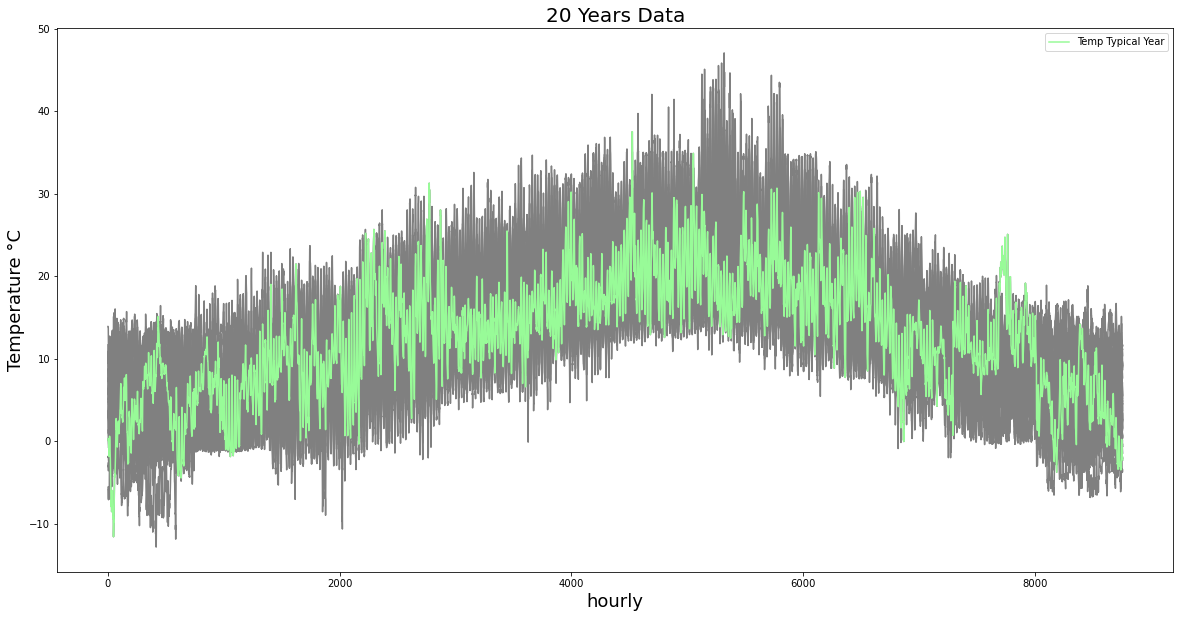

In [35]:
# Plotting the 20 years of temperature and the typical year

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
for i in range(len(list_years_l)):
    ax.plot(list_years_l[i], color='grey')
ax.plot(df_type['tas'].to_list(),color='palegreen',label='Temp Typical Year')
ax.set_xlabel('hourly',fontsize=18)
ax.set_ylabel('Temperature °C',fontsize=18)
ax.set_title('20 Years Data',fontsize=20)
ax.legend()